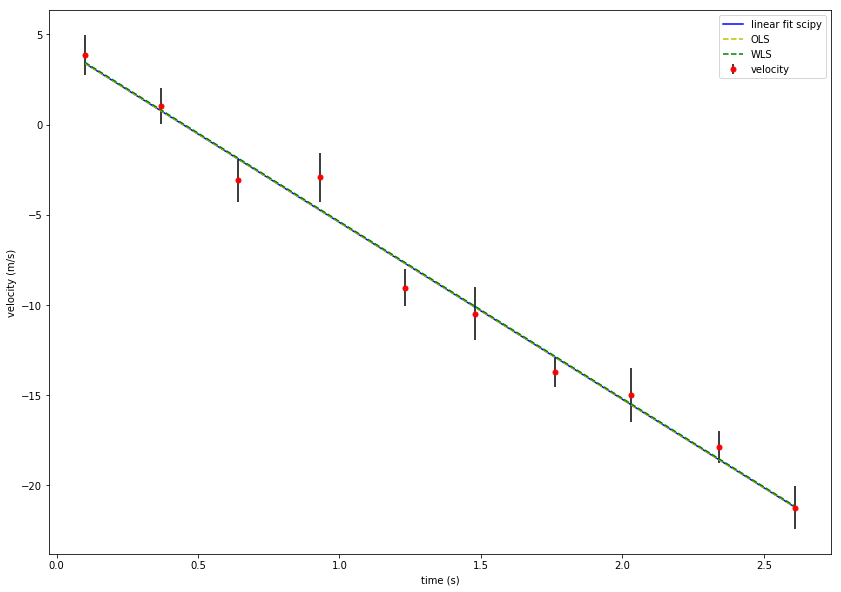

##############################################################################################
                          Linear regression with Scipy Results
Slope: -9.80389373983
Intercept: 4.37845265503
R: -0.993262515283
R2: 0.986570424265
P: 8.94239034466e-09
Std err: 0.404408897817

###############################################################################################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     587.7
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           8.94e-09
Time:                        17:50:31   Log-Likelihood:                -13.327
No. Observations:                  10   AIC:                             30.65
Df Residuals:                       8   BIC:                  

/home/chicolucio/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# read data from file
time, vel, vel_err = np.loadtxt('VelocityVsTime.txt', skiprows=3, unpack=True)

#fit scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(time, vel)

#fit statsmodel OLS
#time = sm.add_constant(time)
#X = np.column_stack((time,vel))
X = sm.add_constant(time)
fit_ols = sm.OLS(vel, X).fit()

#fit statsmodel WLS
fit_wls = sm.WLS(vel, X, weights=vel_err).fit()

# create plot
plt.figure(1, figsize=(14, 10))

plt.errorbar(time,
             vel,
             fmt='ro',
             label="velocity",
             yerr=vel_err,
             markersize=5,
             ecolor='black')

plt.plot(time, intercept + slope * time, 'b-', label="linear fit scipy")

plt.plot(time, fit_ols.fittedvalues, 'y--', label="OLS")

plt.plot(time, fit_wls.fittedvalues, 'g--', label="WLS")

plt.ylabel('velocity (m/s)')
plt.xlabel('time (s)')
plt.legend(loc='upper right')

#plt.savefig('VelocityVsTimeFit.eps')

# display plot on screen
plt.show()

print(
    '##############################################################################################'
)
print('                          Linear regression with Scipy Results')
print('Slope:', slope)
print('Intercept:', intercept)
print('R:', r_value)
print('R2:', r_value**2)
print('P:', p_value)
print('Std err:', std_err)

print(
    '\n###############################################################################################'
)
print(fit_ols.summary())
print(
    '\n###############################################################################################'
)
print(fit_wls.summary())
plt.savefig('VelocityVsTimeFit.eps')